In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')
#pd.options.display.float_format = '{:.3f}'.format
import time

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

## Human Activity Recognition Experiment

CEtpD and Smartlab carried out an experiment to track the activities of 30 subjects. The subjects were tracked performing the following exercises:

- Walking
- Walking Upstairs
- Walking Downstairs
- Sitting 
- Standing
- Laying

The data was collected using the accelerometer and gyroscope of a Samsung Galaxy S II. The smartphone captured the 3-axial linear acceleration and 3-axial angular velocity.

## Research Questions

- What variables are best at predicting Human Activity?
- Can models accurately predict human activity?
- What models are the most accurate?

## Loading the Data

In [2]:
samsung_test_data = pd.read_csv('C:\\Users\\david\Desktop\\thinkful datasets\\test.csv')
samsung_train_data = pd.read_csv('C:\\Users\\david\Desktop\\thinkful datasets\\train.csv')


In [3]:
#30% of data

samsung_test_data.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [4]:
samsung_test_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000


In [5]:
print('Shape of the test data {}'.format(samsung_test_data.shape))
print('Shape of the Train data {}'.format(samsung_train_data.shape))


Shape of the test data (2947, 563)
Shape of the Train data (7352, 563)


The data had 563 columns. The training data had 7352 rows and the test data had 2947 rows of data, or about 40%

In [6]:
samsung_train_data.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [7]:
#Inspecting the number of columns and rows in the dataset
samsung_train_data.shape

(7352, 563)

In [8]:
#Checking for duplicate columns
len(set(samsung_train_data.columns))

563

### Checking for any Null values

In [9]:
set(samsung_train_data.columns.symmetric_difference(samsung_test_data.columns))

set()

In [10]:
set(samsung_train_data.columns).symmetric_difference(set(samsung_test_data.columns))

set()

In [11]:
# Counting nulls in the dataset 
null_count = samsung_train_data.isnull().sum()
null_count[null_count>0]

Series([], dtype: int64)

The inspection returned zero duplicate columns and no null values

In [12]:
#for column in samsung_train_data.columns:
#    print(column)



In [13]:
samsung_train_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [14]:
samsung_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [15]:
np.dtype(samsung_train_data['subject'])


dtype('int64')

In [16]:
np.dtype(samsung_train_data['Activity'])


dtype('O')

In [17]:
#samsung_train_data.dtypes

In [18]:
np.unique(samsung_train_data['Activity'])

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [19]:
#Training variables with subject dropped and the outcome variable removed
#X Values
samsung_train_data.drop(['subject','Activity'], 1).head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


## Determining variables
The target variable for our modeling will be the "Activity" column as we try and predict which movements are most important in determining human activity. The X variables in this case will be the remaining 561 columns.

In [20]:
#Activity will be the y value 
#The X Values will be used to predict what activity the user is doing. 
samsung_train_data['Activity'].head()
y_train = samsung_train_data['Activity']

In [21]:
#Activity will be the y value 
#The X Values will be used to predict what activity the user is doing. 
samsung_train_data['Activity'].head()
X_train = samsung_train_data.drop(['subject','Activity'], 1)


In [22]:
#Test variables with subject dropped and the outcome variable removed

#X Values

X_test = samsung_test_data.drop(['subject','Activity'], 1)

samsung_test_data.drop(['subject','Activity'], 1).head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [23]:
#the y values will be tested against the training set

#Activity will be the y value 

#The X Values will be used to predict what activity the user is doing. 
y_test = samsung_test_data['Activity']

### Check the Data for Balance

The data is balanced as there are no extreme y values that will skrew the data.

In [24]:
(samsung_train_data['Activity'].value_counts()/ len(samsung_train_data)).T

LAYING                0.191376
STANDING              0.186888
SITTING               0.174918
WALKING               0.166757
WALKING_UPSTAIRS      0.145947
WALKING_DOWNSTAIRS    0.134113
Name: Activity, dtype: float64

## Random Forest Classifier

RFC will be the first model used as it performs great with large datasets with multiple columns and provides an accruate model with low variance. RFc will also be a good starting point to see which features are most important in our model. After we run the model with the RFC default parameters we will run the model with just the top 20, 50, 100, 200, and 300 features to generate a model with optimum accuracy. 

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
start_time = time.time()

rfc1 = ensemble.RandomForestClassifier(random_state=42)
rfc1.fit(X_train,y_train)
cv1 = cross_val_score(rfc1, X_train, y_train, cv=5)

print("---RFC takes %s seconds ---" % (time.time() - start_time))

#Test
y_true, y_pred = y_test, rfc1.predict(X_test)
print("Test Set score = {:.3} ".format(accuracy_score(y_true, y_pred)))


print("Training set Cross validation = {}".format(cv1))
print("mean = {:.3}".format(cv1.mean()))
print(pd.crosstab(y_true, y_pred))


---RFC takes 4.800163507461548 seconds ---
Test Set score = 0.907 
Training set Cross validation = [0.89145183 0.89734874 0.9122449  0.90605854 0.93051771]
mean = 0.908
col_0               LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
Activity                                                                     
LAYING                 536        1         0        0                   0   
SITTING                  0      434        57        0                   0   
STANDING                 0       52       480        0                   0   
WALKING                  0        0         0      472                  12   
WALKING_DOWNSTAIRS       0        0         0       23                 358   
WALKING_UPSTAIRS         0        0         0       64                  14   

col_0               WALKING_UPSTAIRS  
Activity                              
LAYING                             0  
SITTING                            0  
STANDING                           0  
WALKING    

## Variable Importance

In [26]:
#Creating a dataframe to examine the tresholds need to run new RFCs

feature_importances = pd.DataFrame(rfc1.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

## Top 10 Features

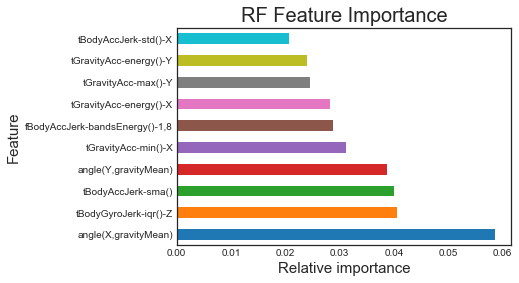

In [27]:
feature_graph = feature_importances['importance'].nlargest(10)
plt.xlabel('Relative importance', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.title("RF Feature Importance", fontsize=20)
feature_graph.plot.barh()

## Training the top 20 Features

In [28]:
#change to 19
feature_importances['importance'][:19].min()

0.016782303422232137

In [29]:
#feature_importances['importance'][:20]

In [30]:
from sklearn.feature_selection import SelectFromModel

# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm_t20 = SelectFromModel(rfc1, threshold=0.016782303422232137)

# Train the selector
sfm_t20.fit(X_train, y_train)


SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=0.016782303422232137)

In [31]:
X_important_train_t20 = sfm_t20.transform(X_train)
X_important_test_t20 = sfm_t20.transform(X_test)

In [32]:


start_time = time.time()

rfc_important_t20 = ensemble.RandomForestClassifier(random_state=42)
rfc_important_t20.fit(X_important_train_t20,y_train)
cv_important_t20 = cross_val_score(rfc_important_t20, X_important_train_t20, y_train, cv=5)

print("---RFC top 20 features takes %s seconds ---" % (time.time() - start_time))

#Test

y_true, y_pred = y_test, rfc_important_t20.predict(X_important_test_t20)
#print(classification_report(y_true, y_pred))
print("Test Set score = {:.3} ".format(accuracy_score(y_true, y_pred)))


print("Training set Cross validation = {}".format(cv_important_t20))
print("mean = {:.3}".format(cv_important_t20.mean()))
print(pd.crosstab(y_true, y_pred))

---RFC top 20 features takes 0.8188109397888184 seconds ---
Test Set score = 0.83 
Training set Cross validation = [0.84464043 0.85384092 0.86394558 0.88495575 0.91825613]
mean = 0.873
col_0               LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
Activity                                                                     
LAYING                 537        0         0        0                   0   
SITTING                  0      380       111        0                   0   
STANDING                 0      111       421        0                   0   
WALKING                  0        0         0      414                  41   
WALKING_DOWNSTAIRS       0        0         0       38                 335   
WALKING_UPSTAIRS         0        0         0       98                  13   

col_0               WALKING_UPSTAIRS  
Activity                              
LAYING                             0  
SITTING                            0  
STANDING                          

## Training the top 50 features

In [33]:
#These are the top 50 features most important to the random forest classifier
#include runtime

feature_importances['importance'][:49].min()

0.0039092083932506065

In [34]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm_t50 = SelectFromModel(rfc1, threshold=0.0039092083932506065)

# Train the selector
sfm_t50.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=0.0039092083932506065)

In [35]:
X_important_train_t50 = sfm_t50.transform(X_train)
X_important_test_t50 = sfm_t50.transform(X_test)

In [36]:
from sklearn.metrics import classification_report

start_time = time.time()

rfc_important_t50 = ensemble.RandomForestClassifier(random_state=42)
rfc_important_t50.fit(X_important_train_t50,y_train)
cv_important_t50 = cross_val_score(rfc_important_t50, X_important_train_t50, y_train, cv=5)



print("---RFC top 50 features takes %s seconds ---" % (time.time() - start_time))

y_true, y_pred = y_test, rfc_important_t50.predict(X_important_test_t50)
#print(classification_report(y_true, y_pred))

print("Test Set score = {:.3} ".format(accuracy_score(y_true, y_pred)))


print("Training set Cross validation = {}".format(cv_important_t50))
print("mean = {:.3}".format(cv_important_t50.mean()))
print(pd.crosstab(y_true, y_pred))

---RFC top 50 features takes 1.307504415512085 seconds ---
Test Set score = 0.874 
Training set Cross validation = [0.86770692 0.88647179 0.87210884 0.9128659  0.92711172]
mean = 0.893
col_0               LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
Activity                                                                     
LAYING                 537        0         0        0                   0   
SITTING                  0      380       111        0                   0   
STANDING                 0       68       464        0                   0   
WALKING                  0        0         0      454                  16   
WALKING_DOWNSTAIRS       0        0         0       15                 358   
WALKING_UPSTAIRS         0        0         0       66                  21   

col_0               WALKING_UPSTAIRS  
Activity                              
LAYING                             0  
SITTING                            0  
STANDING                          

## Training the top 100 features

In [37]:
#Finding the Treshold of the top 100 features

print(feature_importances['importance'][:99].min())

0.0012467118900411059


In [38]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm_t100 = SelectFromModel(rfc1, threshold=0.0012467118900411059)

# Train the selector
sfm_t100.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=0.0012467118900411059)

In [39]:
X_important_train_t100 = sfm_t100.transform(X_train)
X_important_test_t100 = sfm_t100.transform(X_test)

In [40]:
from sklearn.metrics import classification_report

start_time = time.time()

rfc_important_t100 = ensemble.RandomForestClassifier(random_state=42)
rfc_important_t100.fit(X_important_train_t100,y_train)
cv_important_t100 = cross_val_score(rfc_important_t100, X_important_train_t100, y_train, cv=5)


print("---RFC top 100 features takes %s seconds ---" % (time.time() - start_time))


y_true, y_pred = y_test, rfc_important_t100.predict(X_important_test_t100)


print("Test Set score = {:.3} ".format(accuracy_score(y_true, y_pred)))


print("Training set Cross validation = {}".format(cv_important_t100))
print("mean = {:.3}".format(cv_important_t100.mean()))
print(pd.crosstab(y_true, y_pred))

---RFC top 100 features takes 1.784229040145874 seconds ---
Test Set score = 0.904 
Training set Cross validation = [0.90027137 0.87151598 0.88979592 0.92784207 0.92370572]
mean = 0.903
col_0               LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
Activity                                                                     
LAYING                 537        0         0        0                   0   
SITTING                  0      434        57        0                   0   
STANDING                 0       61       470        1                   0   
WALKING                  0        0         0      476                  11   
WALKING_DOWNSTAIRS       0        0         0       17                 358   
WALKING_UPSTAIRS         0        0         0       64                  18   

col_0               WALKING_UPSTAIRS  
Activity                              
LAYING                             0  
SITTING                            0  
STANDING                         

## Training the top 200 features

In [41]:
#Finding the Treshold of the top 200 features

print(feature_importances['importance'][:199].min())

0.0004974809505637701


In [42]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm_t200 = SelectFromModel(rfc1, threshold=0.0004974809505637701)

# Train the selector
sfm_t200.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=0.0004974809505637701)

In [43]:
X_important_train_t200 = sfm_t200.transform(X_train)
X_important_test_t200 = sfm_t200.transform(X_test)

In [44]:
from sklearn.metrics import classification_report

start_time = time.time()

rfc_important_t200 = ensemble.RandomForestClassifier(random_state=42)
rfc_important_t200.fit(X_important_train_t200,y_train)
cv_important_t200 = cross_val_score(rfc_important_t200, X_important_train_t200, y_train, cv=5)


print("---RFC top 200 features takes %s seconds ---" % (time.time() - start_time))
#Test

y_true, y_pred = y_test, rfc_important_t200.predict(X_important_test_t200)
#print(classification_report(y_true, y_pred))

print("Test Set score = {:.3} ".format(accuracy_score(y_true, y_pred)))


print("Training set Cross validation = {}".format(cv_important_t200))
print("mean = {:.3}".format(cv_important_t200.mean()))
print(pd.crosstab(y_true, y_pred))

---RFC top 200 features takes 3.113676071166992 seconds ---
Test Set score = 0.913 
Training set Cross validation = [0.89484396 0.88851122 0.89387755 0.92375766 0.94277929]
mean = 0.909
col_0               LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
Activity                                                                     
LAYING                 537        0         0        0                   0   
SITTING                  0      421        70        0                   0   
STANDING                 0       43       489        0                   0   
WALKING                  0        0         0      473                   8   
WALKING_DOWNSTAIRS       0        0         0       19                 353   
WALKING_UPSTAIRS         0        0         0       43                   9   

col_0               WALKING_UPSTAIRS  
Activity                              
LAYING                             0  
SITTING                            0  
STANDING                         

## Top 250

In [45]:
#Finding the Treshold of the top 250 features

print(feature_importances['importance'][:249].min())

0.00035406660321880433


In [46]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm_t250 = SelectFromModel(rfc1, threshold=0.00035406660321880433)

# Train the selector
sfm_t250.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=0.00035406660321880433)

In [47]:
X_important_train_t250 = sfm_t250.transform(X_train)
X_important_train_t250 = sfm_t250.transform(X_test)

## Training the top 300 features

In [48]:
#Finding the Treshold of the top 300 features

print(feature_importances['importance'][:299].min())

0.0002687968609794586


In [49]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm_t300 = SelectFromModel(rfc1, threshold=0.0002687968609794586)

# Train the selector
sfm_t300.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=0.0002687968609794586)

In [50]:
X_important_train_t300 = sfm_t300.transform(X_train)
X_important_test_t300 = sfm_t300.transform(X_test)

In [51]:
from sklearn.metrics import classification_report

#RANDOM STATE, Seed values put in when done
start_time = time.time()
rfc_important_t300 = ensemble.RandomForestClassifier(random_state=42)
rfc_important_t300.fit(X_important_train_t300,y_train)
cv_important_t300 = cross_val_score(rfc_important_t300, X_important_train_t300, y_train, cv=5)


print("---RFC top 300 features %s seconds ---" % (time.time() - start_time))

#Test

y_true, y_pred = y_test, rfc_important_t300.predict(X_important_test_t300)
#print(classification_report(y_true, y_pred))



print("Test Set score = {:.3} ".format(accuracy_score(y_true, y_pred)))


print("Training set Cross validation = {}".format(cv_important_t300))
print("mean = {:.3}".format(cv_important_t300.mean()))
print(pd.crosstab(y_true, y_pred))

---RFC top 300 features 3.4647388458251953 seconds ---
Test Set score = 0.893 
Training set Cross validation = [0.88263229 0.8946295  0.90612245 0.9149081  0.9400545 ]
mean = 0.908
col_0               LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
Activity                                                                     
LAYING                 537        0         0        0                   0   
SITTING                  0      428        63        0                   0   
STANDING                 0       67       465        0                   0   
WALKING                  0        0         0      472                  12   
WALKING_DOWNSTAIRS       0        0         0       25                 343   
WALKING_UPSTAIRS         0        0         0       56                  27   

col_0               WALKING_UPSTAIRS  
Activity                              
LAYING                             0  
SITTING                            0  
STANDING                           0  

## Gradient Boosting Classifier

GBC was the next model I used as it's multiple iterative learning process results in an accurate model and build upon what RFC can do. Like, RFC we are examining the top features. I will also be creating a second GB model based on the top 200 features since it was the highest performing RFC model. Unlike RFC, I will not go through the whole gammit as RFC takes a very long time to run. 

In [52]:

start_time = time.time()
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'random_state': 42,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)


clf_cv = cross_val_score(clf, X_train, y_train, cv=5)

print("---Gradient Boosting Classifier %s seconds ---" % (time.time() - start_time))
#Test
y_true, y_pred = y_test, clf.predict(X_test)

print("Test Set score = {:.3} ".format(accuracy_score(y_true, y_pred)))


print("Training set Cross validation = {}".format(clf_cv))
print("mean = {:.3}".format(clf_cv.mean()))
print(pd.crosstab(y_true, y_pred))

---Gradient Boosting Classifier 1978.0132710933685 seconds ---
Test Set score = 0.945 
Training set Cross validation = [0.91451832 0.9082257  0.93605442 0.94281824 0.94277929]
mean = 0.929
col_0               LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
Activity                                                                     
LAYING                 537        0         0        0                   0   
SITTING                  0      436        53        0                   0   
STANDING                 0       34       498        0                   0   
WALKING                  0        0         0      482                   1   
WALKING_DOWNSTAIRS       0        0         0        7                 391   
WALKING_UPSTAIRS         0        0         1       23                   5   

col_0               WALKING_UPSTAIRS  
Activity                              
LAYING                             0  
SITTING                            2  
STANDING                      

In [53]:
#Creating a dataframe to examine the tresholds need to run new RFCs

GB_feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

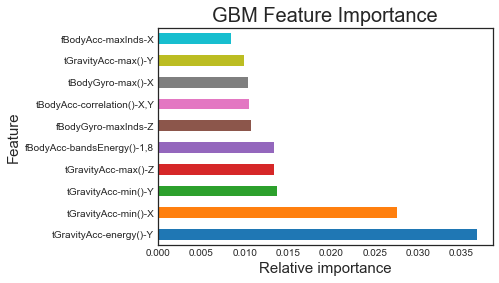

In [54]:
GB_feature_graph = GB_feature_importances['importance'].nlargest(10)
plt.xlabel('Relative importance', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.title("GBM Feature Importance", fontsize=20)
GB_feature_graph.plot.barh()

In [55]:

start_time = time.time()
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'random_state': 42,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf_200 = ensemble.GradientBoostingClassifier(**params)
clf_200.fit(X_important_train_t200, y_train)


clf_200_cv = cross_val_score(clf_200, X_important_train_t200, y_train, cv=5)

print("---Gradient Boosting Classifier %s seconds ---" % (time.time() - start_time))
#Test
y_true, y_pred = y_test, clf.predict(X_test)

print("Test Set score = {:.3} ".format(accuracy_score(y_true, y_pred)))


print("Training set Cross validation = {}".format(clf_200_cv))
print("mean = {:.3}".format(clf_200_cv.mean()))
print(pd.crosstab(y_true, y_pred))



---Gradient Boosting Classifier 737.7579870223999 seconds ---
Test Set score = 0.945 
Training set Cross validation = [0.91791045 0.89802855 0.92244898 0.9496256  0.9380109 ]
mean = 0.925
col_0               LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
Activity                                                                     
LAYING                 537        0         0        0                   0   
SITTING                  0      436        53        0                   0   
STANDING                 0       34       498        0                   0   
WALKING                  0        0         0      482                   1   
WALKING_DOWNSTAIRS       0        0         0        7                 391   
WALKING_UPSTAIRS         0        0         1       23                   5   

col_0               WALKING_UPSTAIRS  
Activity                              
LAYING                             0  
SITTING                            2  
STANDING                       

## Support Vector Classifier With all Features

In [56]:
from sklearn.metrics import confusion_matrix
start_time = time.time()
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)
svm_cv = cross_val_score(svm, X_train, y_train, cv=5)

print("---SVM %s seconds ---" % (time.time() - start_time))

y_true, y_pred = y_test, svm.predict(X_test)

print("Test Set score = {:.3} ".format(accuracy_score(y_true, y_pred)))


print("Training set Cross validation = {}".format(svm_cv))
print("mean = {:.3}".format(svm_cv.mean()))
print(pd.crosstab(y_true, y_pred))

---SVM 14.691758871078491 seconds ---
Test Set score = 0.964 
Training set Cross validation = [0.92469471 0.89938817 0.95986395 0.94622192 0.97275204]
mean = 0.941
col_0               LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
Activity                                                                     
LAYING                 537        0         0        0                   0   
SITTING                  0      435        54        0                   0   
STANDING                 0       16       516        0                   0   
WALKING                  0        0         0      492                   3   
WALKING_DOWNSTAIRS       0        0         0        4                 410   
WALKING_UPSTAIRS         0        0         0       18                   2   

col_0               WALKING_UPSTAIRS  
Activity                              
LAYING                             0  
SITTING                            2  
STANDING                           0  
WALKING         

## Support Vector Classifier With all Features with top 200

In [57]:
from sklearn.metrics import confusion_matrix
start_time = time.time()
from sklearn.svm import SVC
svm_t200 = SVC(kernel='linear')
svm_t200.fit(X_important_train_t200,y_train)
svm_t200_cv = cross_val_score(svm_t200, X_important_train_t200, y_train, cv=5)

print("---SVM %s seconds ---" % (time.time() - start_time))
print("Report:")
y_true, y_pred = y_test, svm_t200.predict(X_important_test_t200)
#print(classification_report(y_true, y_pred))

print("Test Set score = {:.3} ".format(accuracy_score(y_true, y_pred)))


print("Training set Cross validation = {}".format(svm_t200_cv))
print("mean = {:.3}".format(svm_t200_cv.mean()))
print(pd.crosstab(y_true, y_pred))



---SVM 4.858978271484375 seconds ---
Report:
Test Set score = 0.962 
Training set Cross validation = [0.91180461 0.87831407 0.91972789 0.9516678  0.96730245]
mean = 0.926
col_0               LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
Activity                                                                     
LAYING                 537        0         0        0                   0   
SITTING                  0      429        59        0                   0   
STANDING                 0       22       510        0                   0   
WALKING                  0        0         0      492                   2   
WALKING_DOWNSTAIRS       0        0         0        4                 406   
WALKING_UPSTAIRS         0        0         0        9                   0   

col_0               WALKING_UPSTAIRS  
Activity                              
LAYING                             0  
SITTING                            3  
STANDING                           0  
WALKING  

## Support Vector Classifier With all Features with top 100

In [58]:
from sklearn.metrics import confusion_matrix
start_time = time.time()
from sklearn.svm import SVC
svm_t100 = SVC(kernel='rbf')
svm_t100.fit(X_important_train_t100,y_train)
svm_t100_cv = cross_val_score(svm_t100, X_important_train_t100, y_train, cv=5)

print("---SVM %s seconds ---" % (time.time() - start_time))

y_true, y_pred = y_test, svm_t100.predict(X_important_test_t100)
#print(classification_report(y_true, y_pred))


confusion_matrix(y_true, y_pred)


print("Test Set score = {:.3} ".format(accuracy_score(y_true, y_pred)))


print("Training set Cross validation = {}".format(svm_t100_cv))
print("mean = {:.3}".format(svm_t100_cv.mean()))
print(pd.crosstab(y_true, y_pred))


---SVM 7.133926630020142 seconds ---
Test Set score = 0.924 
Training set Cross validation = [0.92333786 0.88647179 0.90612245 0.94145677 0.9352861 ]
mean = 0.919
col_0               LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
Activity                                                                     
LAYING                 537        0         0        0                   0   
SITTING                  0      387       103        0                   0   
STANDING                 0       34       498        0                   0   
WALKING                  0        0         0      490                   3   
WALKING_DOWNSTAIRS       0        0         0       12                 368   
WALKING_UPSTAIRS         0        0         0       26                   1   

col_0               WALKING_UPSTAIRS  
Activity                              
LAYING                             0  
SITTING                            1  
STANDING                           0  
WALKING          

# Conclusions

Setting the model paratmeters to only include the top 200 features seemed to be the sweet spot. From RFC, SVM and GBM, all of the top perfomring models were with 200 features. RFC's top 200 feature model was 91.3% and GBM was 94.5%. The top performing model was the SVM model with 200 features with a score of 96.2%. If runtime is of signficance the RFC model with 200 features is the best choice as it runs in just under 3 seconds and still has an accuracy of 91.3%. GBM returns a 94.5% accuracy at 200 features but, it takes over 12 minutes to run! SVM again proves to be the solid choice as it runs in 4.4 seconds and still returns its accuracy of 96.2%! 